# Regularization

### Cost for logistic regression regularized:
For $d$-features and $n$-examples and $\lambda$ being the regularization parameter:
$$\begin{align}
    J(\vec{w},b) = \dfrac{1}{2n} \sum_{i=1}^{n} \Bigl(f_{\vec{w},b}(\vec{x}^{(i)})-y^{(i)} \Bigr)^2 + \underbrace{\dfrac{\lambda}{2n} \sum_{j=1}^{d} w_j^2}_{\text{regularization term}}  \nonumber
\end{align}$$

where $$f_{\vec{w},b}(\vec{x}) = \vec{w} \cdot \vec{x} + b$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def cost_linreg_reg(X,y,w,b, regu_lambda=1):
    """
    Computing cost function for regularized linear regression:
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b : scalar, parameter
    regu : regularization parameter lambda
    
    Output:
    cost : (scalar), Cost of predicted values
    """
    n = X.shape[0]
    d = len(w)
    cost = 0.0
    regu_cost = 0.0
    
    for i in range(n):
        f_wb_i = np.dot(X[i],w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*n)
    
    for j in range(d):
        regu_cost = regu_cost + (w[j]**2)
    regu_cost = regu_cost *(regu_lambda/(2*n))
        
    total = cost + regu_cost
    
    return total

In [4]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = cost_linreg_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214275


### Cost for logistic regression regularized:
$$
\begin{align}
    J(\vec{w},b) = \dfrac{1}{n} \left[ \sum_{i=1}^{n} -y^{(i)}log(f_{\vec{w},b} (\vec{x}^{(i)})) - (1-y^{(i)})log(1-f_{\vec{w},b}(\vec{x}^{(i)})) \right] + \dfrac{\lambda}{2n} \sum_{j=1}^{d}w_j^2 \nonumber
\end{align}$$
where 
$$\begin{align}
    z & = \vec{w} \cdot \vec{x} + b \nonumber \\
    f_{\vec{w},b}(\vec{x}) &= \dfrac{1}{1+e^{-z}}, \quad 0< f_{\vec{w},b}(\vec{x})<1 \nonumber
\end{align}$$


In [5]:
def cost_logreg_regu(X,y,w,b,regu_lambda=1):
    """
    Computing cost function for regularized logistic regression:
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b : scalar, parameter
    regu : scalar, regularization parameter lambda
    
    Output:
    cost : (scalar), Cost of predicted values
    """
    n,d = X.shape
    cost = 0.0
    regu_cost = 0.0
    
    for i in range(n):
        z_i = np.dot(X[i],w)+b
        f_wb_i = sigmoid(z_i)
        cost = cost + -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i)
    
    cost = cost/n
    
    for j in range(d):
        regu_cost = regu_cost + w[j]**2
    regu_cost = regu_cost*(regu_lambda/(2*n))
    
    total = regu_cost + cost
    
    return total

In [6]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = cost_logreg_regu(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


### Gradient descent regularized
Gradient descent updates are as follows:
$$
\begin{align}
    w_j & \leftarrow w_j  - \alpha \left[ \dfrac{1}{n}\sum_{i=1}^{n} \left[ (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})(x_j^{(i)}) \right] +\dfrac{\lambda}{n}w_j \right] \nonumber \\
    b & \leftarrow b  - \alpha \dfrac{1}{n}\sum_{i=1}^{n} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)}) \nonumber
\end{align}$$

Linear regression and logistic regression have the same update rule except that $f_{\vec{w},b}(\vec{x})$ is different.

In [18]:
def pdv_logreg_regu(X,y,w,b,regu_lambda=1):
    """
    Computes the partial derivatives for gradient descent in logistic regression
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b : scalar, parameter
    regu_lambda : scalar,regularization parameter lambda
    
    Output:
    dj_dw : (ndarray(d,)), Gradient of cost function w.r.t w
    dj_db : (scalar), Partial derivative of cost function w.r.t b
    """
    n,d = X.shape
    dj_dw = np.zeros(d,)
    dj_db = 0.0
    
    for i in range(n):
        temp = np.dot(X[i],w) + b - y[i]
        for j in range(d):
            dj_dw[j] += temp*X[i,j]
        dj_db += temp
            
    dj_dw = dj_dw/n
    dj_db = dj_db/n
    
    for j in range(d):
        dj_dw[j] = dj_dw[j] + (regu_lambda/n)*w[j]
        
    return dj_dw,dj_db

In [20]:
def graddesc_logreg_regu(X, y, w_in, b_in, alpha, num, regu_lambda=1):
    """
    Computes gradient descent for logistic regression
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w_in : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b_in : scalar, parameter
    alpha : scalar, learning rate
    num : (int), number of iterations
    regu_lambda : scalar, regularization parameter lambda
    
    Outputs: 
    w : final value of parameter after gradient descent
    b : final value of parameter after gradient descent
    J_hist : (list), cost values list
    """
    
    J_hist = []
    w = w_in
    b = b_in
    
    for i in range(num):
        dj_dw,dj_db = pdv_logreg_regu(X,y,w,b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    
        if i<10000:
            J_hist.append(cost_logreg_regu(X,y,w,b))
    
    return w,b,J_hist

In [21]:
np.random.seed(0)

n_samples = 100
n_features = 2


X_test = np.random.rand(n_samples, n_features)
y_test = np.random.randint(2, size=n_samples)

w_initial = np.random.rand(n_features)
b_initial = 0.5

alpha = 0.01
num_iterations = 1000
regu_lambda = 0.1

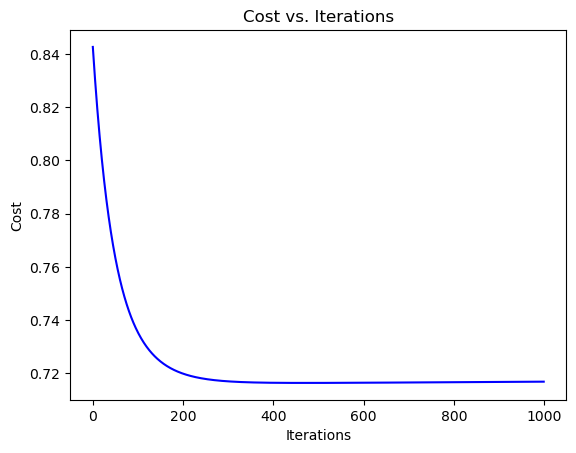

In [23]:
def plot_cost_history(J_hist):
    plt.plot(range(len(J_hist)), J_hist, color='b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs. Iterations')
    plt.show()

# Use the gradient descent function to train your model
w_final, b_final, J_hist = graddesc_logreg_regu(X_test, y_test, w_initial,
                                                b_initial, alpha, num_iterations, regu_lambda)

# Plot the cost function history
plot_cost_history(J_hist)